# Обработка пропущенных значений

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
billion = '/Users/eva/Documents/Учеба/jupnote/forbes_2022_billionaires.csv'
df = pd.read_csv(billion, sep=",")

In [58]:
df

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,66.0,1000.0,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,1955-09-01,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000.0,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,1963-03-01,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000.0,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,1965-03-06,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000.0,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,1978-07-11,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [60]:
#удаляем ненужные столбцы
df.pop('bio')
df.pop('about')

0       Musk was accepted to a graduate program at Sta...
1       Growing up, Jeff Bezos worked summers on his g...
2       Arnault apparently wooed his wife, Helene Merc...
3       When Gates was a kid, he spent so much time re...
4       Buffett still lives in the same Omaha, Nebrask...
                              ...                        
2663                                                  NaN
2664                                                  NaN
2665                                                  NaN
2666                                                  NaN
2667                                                  NaN
Name: about, Length: 2668, dtype: object

In [61]:
#удалим объекты, где в нижеуказанных столбцах присутствуют пропущенные значения. Импьютация в эти столбцы существенно нарушит правильность данных, что сделает модель очень неточной
df.dropna(subset=['state'], inplace=True)
df.dropna(subset=['organization'], inplace=True)
df.dropna(subset=['residenceMsa'], inplace=True)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 2624
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  230 non-null    int64  
 1   personName            230 non-null    object 
 2   age                   229 non-null    float64
 3   finalWorth            230 non-null    float64
 4   year                  230 non-null    int64  
 5   month                 230 non-null    int64  
 6   category              230 non-null    object 
 7   source                230 non-null    object 
 8   country               230 non-null    object 
 9   state                 230 non-null    object 
 10  city                  230 non-null    object 
 11  countryOfCitizenship  230 non-null    object 
 12  organization          230 non-null    object 
 13  selfMade              230 non-null    bool   
 14  gender                229 non-null    object 
 15  birthDate             

In [64]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / 230) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка gender. Тип данных object. Количество пустых значений 1, 0.43%.
Колонка birthDate. Тип данных object. Количество пустых значений 1, 0.43%.
Колонка title. Тип данных object. Количество пустых значений 2, 0.87%.


In [65]:
cat_temp_data = df[['gender']]
cat_temp_data.head()

,gender
1,M
3,M
4,M
5,M
6,M


In [66]:
cat_temp_data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [67]:
cat_temp_data[cat_temp_data['gender'].isnull()].shape

(1, 1)

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [70]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
      

In [71]:
np.unique(data_imp2)

array(['F', 'M'], dtype=object)

In [74]:
cat_temp_data1 = df[['title']]
cat_temp_data1.head()

,title
1,Entrepreneur
3,Cofounder
4,CEO
5,Entrepreneur
6,Cofounder and board member


In [75]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp3 = imp3.fit_transform(cat_temp_data1)
data_imp3

array([['Entrepreneur'],
       ['Cofounder'],
       ['CEO'],
       ['Entrepreneur'],
       ['Cofounder and board member'],
       ['Owner'],
       ['CEO'],
       ['Cofounder'],
       ['Chairman and CEO'],
       ['Philanthropist'],
       ['Director'],
       ['CEO'],
       ['Chairman and CEO'],
       ['Chairman'],
       ['Chairman and CEO'],
       ['Founder'],
       ['Founder & CEO'],
       ['Chairman Emeritus '],
       ['Founder & Co-Chief Investment Officer'],
       ['Chairman & CEO'],
       ['Chairman and CEO'],
       ['CEO & President'],
       ['Founder'],
       ['Chairman and CEO'],
       ['Entrepreneur'],
       ['Founder'],
       ['Investor, Philanthropist'],
       ['Chairman'],
       ['Chief Executive Officer'],
       ['Entrepreneur'],
       ['Investor'],
       ['Investor'],
       ['CEO and Cofounder'],
       ['Founder'],
       ['Cofounder'],
       ['Entrepreneur'],
       ['Entrepreneur'],
       ['Entrepreneur'],
       ['President and General M

In [76]:
np.unique(data_imp3)

array(['Board Member', 'CEO', 'CEO & President', 'CEO and Chairman',
       'CEO and Cofounder', 'CEO and Founder', 'COO', 'Chair', 'Chairman',
       'Chairman ', 'Chairman & CEO', 'Chairman Emeritus ',
       'Chairman Emeritus of the Board of Simon Property Group, Inc.',
       'Chairman and CEO', 'Chairman and Co-founder',
       'Chairman and Founder', 'Chairman of the Board',
       'Chairman, President & Chief Executive Officer',
       'Chief Executive Officer', 'Chief Product Officer & Cofounder',
       'Chief executive officer', 'Co-Chair', 'Co-Chair and Co-CEO',
       'Co-Chairman', 'Co-Chief Executive Officer and Co-founder',
       'Co-Founder', 'Co-Founder & CEO',
       'Co-Founder, Executive Vice President', 'Co-founder and CEO',
       'Co-founder, ex chairman of the board', 'Cochair', 'Cofounder',
       'Cofounder and CEO', 'Cofounder and Chairman Emeritus',
       'Cofounder and Co-Chief Investment Officer',
       'Cofounder and board member', 'Cofounder, CEO',
 

In [78]:
cat_temp_data2 = df[['birthDate']]
cat_temp_data2.head()

,birthDate
1,1964-01-12
3,1955-10-28
4,1930-08-30
5,1973-03-26
6,1973-08-21


In [79]:
#Лучше удалить данный объект с пропущенным значением, но продемонстрируем импьютацию константой
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp4 = imp4.fit_transform(cat_temp_data2)
data_imp4

array([['1964-01-12'],
       ['1955-10-28'],
       ['1930-08-30'],
       ['1973-03-26'],
       ['1973-08-21'],
       ['1956-03-24'],
       ['1942-02-14'],
       ['1984-05-14'],
       ['1948-06-07'],
       ['1949-10-07'],
       ['1944-10-27'],
       ['1935-11-01'],
       ['1965-02-23'],
       ['1938-02-24'],
       ['1947-02-14'],
       ['1938-04-25'],
       ['1968-10-15'],
       ['1933-03-19'],
       ['1949-08-08'],
       ['1961-12-19'],
       ['1931-03-11'],
       ['1963-02-17'],
       ['1956-06-11'],
       ['1945-12-11'],
       ['1940-01-22'],
       ['1936-02-16'],
       ['1963-11-06'],
       ['1932-05-11'],
       ['1978-03-10'],
       ['1940-09-21'],
       ['1951-06-29'],
       ['1937-07-29'],
       ['1981-08-29'],
       ['1948-09-30'],
       ['1984-05-22'],
       ['1967-06-21'],
       ['1951-03-29'],
       ['1947-03-02'],
       ['1942-10-13'],
       ['1975-06-21'],
       ['1981-08-21'],
       ['1943-02-21'],
       ['1942-07-29'],
       ['19

Обработаем пропущенные значения в числовых данных

In [80]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / 230) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка age. Тип данных float64. Количество пустых значений 1, 0.43%.
Колонка philanthropyScore. Тип данных float64. Количество пустых значений 70, 30.43%.
Колонка numberOfSiblings. Тип данных float64. Количество пустых значений 223, 96.96%.


In [82]:
data_num = df[num_cols]
data_num

,age,philanthropyScore,numberOfSiblings
1,58.0,1.0,NaN
3,66.0,4.0,NaN
4,91.0,5.0,NaN
5,49.0,1.0,NaN
6,48.0,1.0,NaN
...,...,...,...
2462,29.0,NaN,NaN
2489,54.0,NaN,NaN
2588,66.0,NaN,NaN
2593,69.0,NaN,NaN


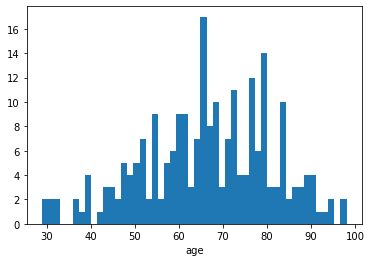

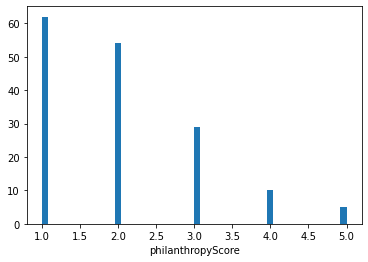

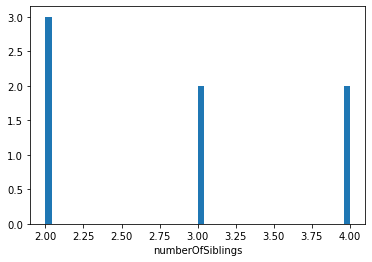

In [84]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [85]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [86]:
strategies=['mean', 'median', 'most_frequent']

In [92]:
#после сравнения трех стратегий оставил следующий вариант
test_num_impute_col(df, 'age', strategies[1])

('age', 'median', 1, 67.0, 67.0)

In [94]:
#Предположим, что в данном столбце вместо пропущенных значений должен быть 0. В пользу этой гипотезы идет диаграмма (см. выше)
df["philanthropyScore"].fillna(0, inplace = True)
#Также подобным образом поступим и с данным столбцом. Лучше было удалить объекты с пропущенными значениями,т.к. их достаточно много, но для демонстрации данные объекты были оставлены
df["numberOfSiblings"].fillna(0, inplace = True)

Таким образом, все пропущенные значения были обработаны

# Кодирование категориальных признаков

In [95]:
df.category.unique()

array(['Technology', 'Finance & Investments', 'Media & Entertainment',
       'Fashion & Retail', 'Diversified', 'Energy', 'Real Estate',
       'Construction & Engineering', 'Sports', 'Manufacturing',
       'Food & Beverage', 'Service', 'Logistics', 'Automotive',
       'Gambling & Casinos', 'Healthcare'], dtype=object)

In [96]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [97]:
le = LabelEncoder()
df_le = le.fit_transform(df['category'])

In [98]:
np.unique(df_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [99]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

array(['Automotive', 'Construction & Engineering', 'Diversified',
       'Energy', 'Fashion & Retail', 'Finance & Investments',
       'Food & Beverage', 'Gambling & Casinos', 'Healthcare', 'Logistics',
       'Manufacturing', 'Media & Entertainment', 'Real Estate', 'Service',
       'Sports', 'Technology'], dtype=object)

# Масштабирование данных

In [100]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [101]:
MMS = MinMaxScaler()
MMS_df = MMS.fit_transform(df[['age']])

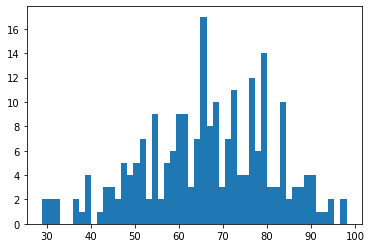

In [102]:
plt.hist(df['age'], 50)
plt.show()

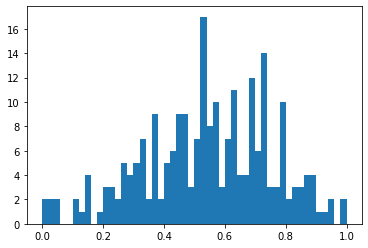

In [103]:
plt.hist(MMS_df, 50)
plt.show()